In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Загрузка датасета

In [2]:
x_dataset = pd.read_csv('./data/22_x.csv',names=['x1','x2','x3','x4','x5', 'x6'], header=None) #признаки
y_dataset = pd.read_csv('./data/22_y.csv', names = ['Y'], header=None) #значения целевой переменной

In [3]:
x_dataset.head()

,x1,x2,x3,x4,x5,x6
0,-1.093220,0.606847,-1.389804,0.157096,-2.297255,0.128341
1,0.068189,-0.748682,-2.608495,0.822826,0.675069,-0.342655
2,-0.811608,0.177087,0.309421,-0.910204,0.497023,-0.159383
3,-0.775218,-0.434001,-0.682047,1.462780,1.126234,1.296343
4,0.926433,0.238571,2.291793,-2.393233,-1.564427,-2.239500


### Количественное описание датасета

#### Количество точек данных:

In [4]:
x_dataset.shape

(414, 6)

In [5]:
y_dataset.shape

(414, 1)

#### Статистика по каждому признаку:

In [6]:
x_dataset.describe()

,x1,x2,x3,x4,x5,x6
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,-0.146922,-0.033631,0.029435,0.066634,0.010922,-0.033397
std,1.030268,0.964136,0.988827,1.058884,1.022649,1.029279
min,-2.738719,-3.212788,-2.608495,-2.950329,-2.788647,-2.930388
25%,-0.825797,-0.600797,-0.696965,-0.638367,-0.653561,-0.751798
50%,-0.098599,-0.005175,0.079230,0.045475,-0.004277,-0.028745
75%,0.548134,0.655611,0.690643,0.823746,0.659966,0.623096
max,3.235555,2.459777,2.888125,3.037847,3.466630,3.175308


### Разделение всех наблюдений на обучающую и тестовую выборки в соотношении 80-20

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=22)

In [8]:
x_train.shape, y_train.shape

((331, 6), (331, 1))

In [9]:
x_test.shape, y_test.shape

((83, 6), (83, 1))

### Построение парной регрессионной модели, визуализация линии регрессии и исходных данных на графике и коэффициенты.

По столбцу:  x1
Score:  -0.0051064400140836685


C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


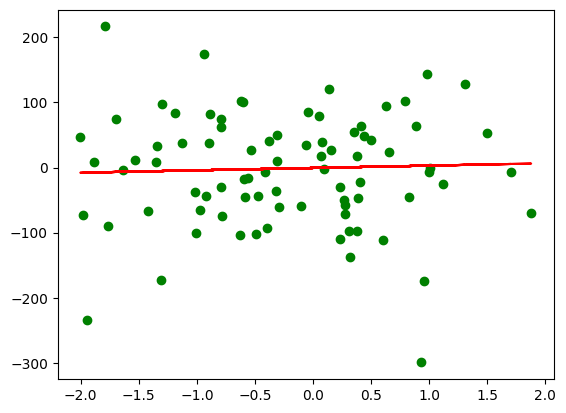





По столбцу:  x2
Score:  0.01048528991519837


C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


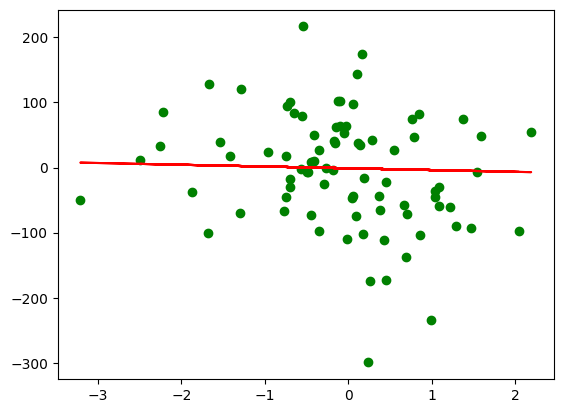





По столбцу:  x3
Score:  -0.02348558863969119


C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


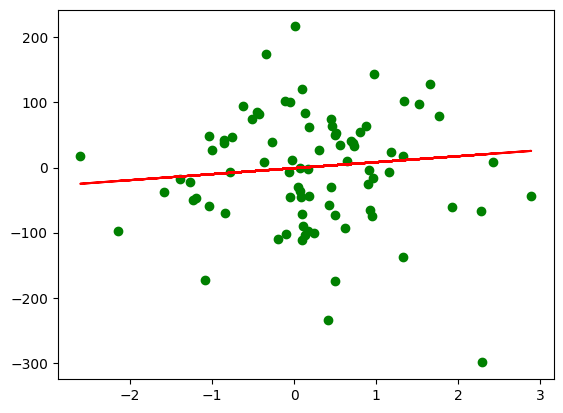

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"






По столбцу:  x4
Score:  -0.0014868655849289425


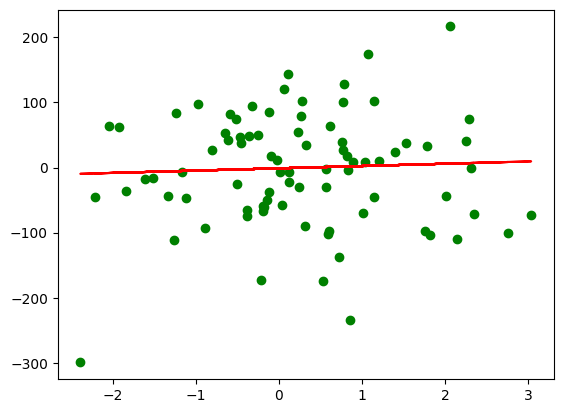





По столбцу:  x5
Score:  0.31822680537122283


C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


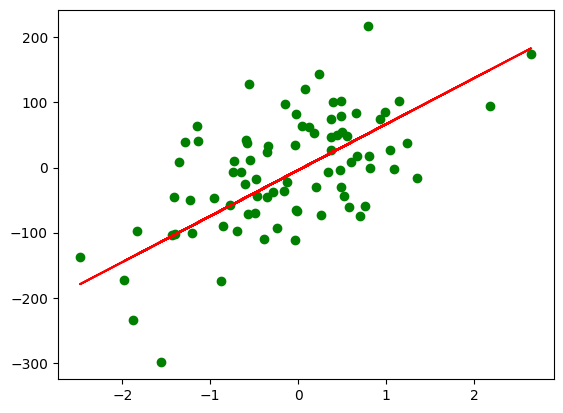

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"






По столбцу:  x6
Score:  0.43481053829542693


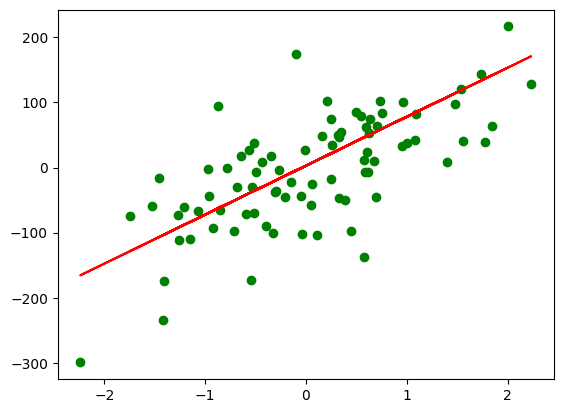

In [10]:
regs_list = [] 

for col in x_train.columns:
    print('По столбцу: ', col)
    new_reg = LinearRegression().fit(x_train[[col]].values, y_train.values) #создали модель
    predicted_values = new_reg.predict(x_test[[col]].values) #предсказанные данные
    print('Score: ', new_reg.score(x_test[[col]], y_test.values)) #показатель эффективности модели
    regs_list.append(new_reg) 
    
    plt.figure() #строим график
    plt.scatter(x_test[[col]].values, y_test.values, color='g') #реальные данные
    plt.plot(x_test[[col]].values, predicted_values, color='r') #линия регрессии
    plt.show()
    
    print('\n\n\n')

Мы видим, что ни одна из парных регрессий, представленных выше, не справляется со своей задачей на должном уровне. Об этом говорит низкий score() (чем ближе значение Score к 1, тем лучше), большой разброс точек с реальными данными относительно прямой предсказания, большой промах по предсказанным значениям на конкретных примерах.

### Построение модели множественной линейной регрессии целевой переменной от всех показателей. Оценка качества регрессии, сделайте вывод.

In [11]:
reg_multi = LinearRegression().fit(x_train, y_train) #создали и обучили

In [12]:
print('Score: ', reg_multi.score(x_test, y_test))

Score:  0.9914328334459352


Мы видим, что качество предсказания множественной регрессии находится на высоком уровне. Это доказывается методом score(), чей показатель близок к 1.0